In [1]:
!pip install opencv-python

In [2]:
import cv2

In [18]:
img1 = cv2.imread('/Users/kathleendewandre/code/dcorballorenzo/FF2S/raw_data/photo/photo1/image1317.jpg')

In [19]:
img1

array([[[ 71,  92,  83],
        [ 69,  90,  81],
        [ 65,  86,  77],
        ...,
        [159, 181, 146],
        [166, 186, 151],
        [166, 186, 151]],

       [[ 72,  93,  84],
        [ 69,  90,  81],
        [ 66,  87,  78],
        ...,
        [159, 181, 146],
        [161, 183, 148],
        [163, 183, 148]],

       [[ 72,  93,  84],
        [ 70,  91,  82],
        [ 66,  87,  78],
        ...,
        [154, 178, 143],
        [158, 180, 145],
        [158, 180, 145]],

       ...,

       [[132,  83, 235],
        [127,  78, 230],
        [119,  72, 224],
        ...,
        [ 63,  87,  99],
        [ 55,  81,  93],
        [ 58,  84,  96]],

       [[127,  80, 233],
        [126,  79, 231],
        [126,  79, 231],
        ...,
        [ 60,  84,  96],
        [ 59,  85,  97],
        [ 59,  85,  97]],

       [[127,  80, 233],
        [126,  79, 232],
        [126,  79, 231],
        ...,
        [ 58,  82,  94],
        [ 50,  76,  88],
        [ 50,  76,  88]]

In [18]:
from PIL import Image

In [21]:
from google.cloud import storage

storage_client = storage.Client("ff2s-370015")
bucket = storage_client.bucket("ff2s")


In [22]:
blob = bucket.blob('preproc_data/photo1_preproc/image0001.jpg')

In [25]:
import tensorflow as tf

2022-11-29 16:59:26.941247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#!gsutil cp -r gs://ff2s/preproc_data/photo1_preproc/ raw_data/processed_img

In [37]:
ds_paths = tf.data.Dataset.list_files("gs://ff2s/preproc_data/photo*/*.jpg")

In [38]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [41]:
ds_img = ds_paths.map(load_image)#.batch(16)

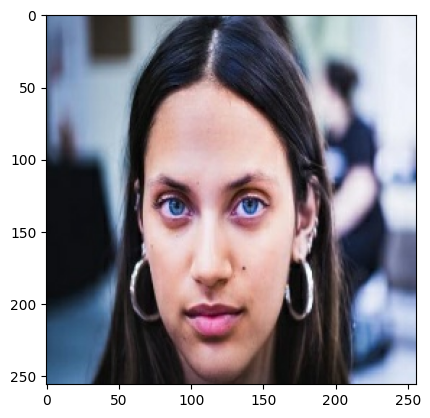

In [46]:
plt.imshow(next(iter(ds_img.take(1))).numpy())

In [47]:
ds_img

<MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>

In [57]:
photo_path = "../preproc_data/photo1_preproc/"

#Get the list of files in the path and sort it 
photo_list = os.listdir(photo_path)
photo_list.sort()
photo_list

['image0001.jpg',
 'image0002.jpg',
 'image0003.jpg',
 'image0004.jpg',
 'image0005.jpg',
 'image0006.jpg',
 'image0007.jpg',
 'image0008.jpg',
 'image0009.jpg',
 'image0010.jpg',
 'image0011.jpg',
 'image0012.jpg',
 'image0013.jpg',
 'image0014.jpg',
 'image0015.jpg',
 'image0016.jpg',
 'image0017.jpg',
 'image0018.jpg',
 'image0019.jpg',
 'image0020.jpg',
 'image0021.jpg',
 'image0022.jpg',
 'image0023.jpg',
 'image0024.jpg',
 'image0025.jpg',
 'image0026.jpg',
 'image0027.jpg',
 'image0028.jpg',
 'image0029.jpg',
 'image0030.jpg',
 'image0031.jpg',
 'image0032.jpg',
 'image0033.jpg',
 'image0034.jpg',
 'image0035.jpg',
 'image0036.jpg',
 'image0037.jpg',
 'image0038.jpg',
 'image0039.jpg',
 'image0040.jpg',
 'image0041.jpg',
 'image0042.jpg',
 'image0043.jpg',
 'image0044.jpg',
 'image0045.jpg',
 'image0046.jpg',
 'image0047.jpg',
 'image0048.jpg',
 'image0049.jpg',
 'image0050.jpg',
 'image0051.jpg',
 'image0052.jpg',
 'image0053.jpg',
 'image0054.jpg',
 'image0055.jpg',
 'image005

In [58]:
import numpy as np
import os
import matplotlib.pyplot as plt
photo_array= np.asarray([np.asarray(plt.imread(photo_path+image)) for image in photo_list])
photo_array

array([[[[ 50, 151, 117],
         [ 47, 148, 114],
         [ 46, 147, 113],
         ...,
         [ 73, 170, 116],
         [ 75, 169, 116],
         [ 76, 170, 117]],

        [[ 55, 156, 122],
         [ 53, 154, 120],
         [ 51, 152, 118],
         ...,
         [ 78, 175, 121],
         [ 79, 173, 120],
         [ 79, 173, 120]],

        [[ 56, 157, 123],
         [ 55, 156, 122],
         [ 54, 155, 121],
         ...,
         [ 84, 181, 127],
         [ 83, 177, 124],
         [ 82, 176, 123]],

        ...,

        [[101,  66,  47],
         [ 84,  49,  30],
         [105,  70,  51],
         ...,
         [ 80,  57,  39],
         [ 71,  54,  38],
         [ 68,  52,  37]],

        [[ 99,  62,  46],
         [101,  64,  46],
         [100,  63,  45],
         ...,
         [ 75,  56,  39],
         [ 65,  52,  36],
         [ 63,  51,  37]],

        [[ 96,  59,  43],
         [104,  67,  51],
         [ 88,  51,  33],
         ...,
         [ 72,  55,  37],
        

In [65]:
photo_array.shape
photo_array[0].shape

(256, 256, 3)

In [66]:
sketch_path = "../preproc_sketch/sketch1_preproc/"

#Get the list of files in the path and sort it 
sketch_list = os.listdir(sketch_path)
sketch_list.sort()
sketch_list

['sketch0001.jpg',
 'sketch0002.jpg',
 'sketch0003.jpg',
 'sketch0004.jpg',
 'sketch0005.jpg',
 'sketch0006.jpg',
 'sketch0007.jpg',
 'sketch0008.jpg',
 'sketch0009.jpg',
 'sketch0010.jpg',
 'sketch0011.jpg',
 'sketch0012.jpg',
 'sketch0013.jpg',
 'sketch0014.jpg',
 'sketch0015.jpg',
 'sketch0016.jpg',
 'sketch0017.jpg',
 'sketch0018.jpg',
 'sketch0019.jpg',
 'sketch0020.jpg',
 'sketch0021.jpg',
 'sketch0022.jpg',
 'sketch0023.jpg',
 'sketch0024.jpg',
 'sketch0025.jpg',
 'sketch0026.jpg',
 'sketch0027.jpg',
 'sketch0028.jpg',
 'sketch0029.jpg',
 'sketch0030.jpg',
 'sketch0031.jpg',
 'sketch0032.jpg',
 'sketch0033.jpg',
 'sketch0034.jpg',
 'sketch0035.jpg',
 'sketch0036.jpg',
 'sketch0037.jpg',
 'sketch0038.jpg',
 'sketch0039.jpg',
 'sketch0040.jpg',
 'sketch0041.jpg',
 'sketch0042.jpg',
 'sketch0043.jpg',
 'sketch0044.jpg',
 'sketch0045.jpg',
 'sketch0046.jpg',
 'sketch0047.jpg',
 'sketch0048.jpg',
 'sketch0049.jpg',
 'sketch0050.jpg',
 'sketch0051.jpg',
 'sketch0052.jpg',
 'sketch0053

In [67]:
sketch_array= np.asarray([np.asarray(plt.imread(sketch_path+image)) for image in sketch_list])
sketch_array

array([[[[240, 240, 240],
         [242, 242, 242],
         [244, 244, 244],
         ...,
         [240, 240, 240],
         [244, 244, 244],
         [245, 245, 245]],

        [[247, 247, 247],
         [248, 248, 248],
         [249, 249, 249],
         ...,
         [222, 222, 222],
         [229, 229, 229],
         [238, 238, 238]],

        [[248, 248, 248],
         [249, 249, 249],
         [248, 248, 248],
         ...,
         [229, 229, 229],
         [230, 230, 230],
         [236, 236, 236]],

        ...,

        [[251, 251, 251],
         [252, 252, 252],
         [250, 250, 250],
         ...,
         [248, 248, 248],
         [249, 249, 249],
         [250, 250, 250]],

        [[249, 249, 249],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [247, 247, 247],
         [248, 248, 248],
         [249, 249, 249]],

        [[254, 254, 254],
         [251, 251, 251],
         [249, 249, 249],
         ...,
         [247, 247, 247],
        

In [60]:
image_shape= (256,256,3)

In [69]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
#from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

In [70]:
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [71]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

In [72]:
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

In [73]:
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = photo_array[0]
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model